# Calculate resource requirements for different formulations

In [1]:
from modules.helper_functions_tsp import find_problem_size
import numpy as np
import math
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
from modules.helper_functions_tsp import (find_distances_array,
                                          hot_start,
                                          hot_start_list_to_string,
                                          cost_fn_fact,
                                          )

In [2]:
LAYERS = 2
MIN_SIZE = 5
MAX_SIZE = 60
STEP = 5
from modules.config import (GRAPH_DIR,
                            GRAY,
                            DECODING_FORMULATION,
                            )
                            
GRAPH_FILE_NAME = 'binary_variables.png'

In [3]:
def calculate_ml_network_size(binary_variables, layers=LAYERS):
    fc_weights = binary_variables**2 * layers
    bias_weights = binary_variables * layers
    total_weights = fc_weights + bias_weights
    return(total_weights)

In [4]:
def calculate_combinations(n):
    fact = math.factorial(n-1)
    return (fact / 2)

In [5]:
array_size = 1 + (MAX_SIZE-MIN_SIZE)/STEP
print(f'Array size is {array_size}')
if abs((int(array_size) - array_size)) > 0.1:
    raise Exception('Error calculating integer array size - please chose new parameters')
array_size = int(array_size)
locations_array = np.zeros((array_size, 4))
for index in range(array_size):
    locations = MIN_SIZE + (STEP * index)
    original_formulation_size = find_problem_size(locations, method='original')
    new_formulation_size = find_problem_size(locations, method='new')
    combinations = calculate_combinations(locations)
    problem_space_size = 2**original_formulation_size
    ml_network_size = calculate_ml_network_size(original_formulation_size)
    print(f'For {locations} locations the binary variables needed in the non-factorial formulation is {original_formulation_size} '
    f'and in the factorial formulation is {new_formulation_size}.')
    print(f'There are {combinations:.2e} combinations and the dimension of the binary problem is {problem_space_size:.2e}')
    print(f'The size of the neural network needed is {ml_network_size}')

    locations_array[index,0] = locations
    locations_array[index,1] = original_formulation_size
    locations_array[index,2] = new_formulation_size
    locations_array[index,3] = combinations
    

Array size is 12.0
For 5 locations the binary variables needed in the non-factorial formulation is 5 and in the factorial formulation is 7.
There are 1.20e+01 combinations and the dimension of the binary problem is 3.20e+01
The size of the neural network needed is 60
For 10 locations the binary variables needed in the non-factorial formulation is 21 and in the factorial formulation is 22.
There are 1.81e+05 combinations and the dimension of the binary problem is 2.10e+06
The size of the neural network needed is 924
For 15 locations the binary variables needed in the non-factorial formulation is 41 and in the factorial formulation is 41.
There are 4.36e+10 combinations and the dimension of the binary problem is 2.20e+12
The size of the neural network needed is 3444
For 20 locations the binary variables needed in the non-factorial formulation is 64 and in the factorial formulation is 62.
There are 6.08e+16 combinations and the dimension of the binary problem is 1.84e+19
The size of the n

In [6]:
filename = Path(GRAPH_DIR).joinpath(GRAPH_FILE_NAME)

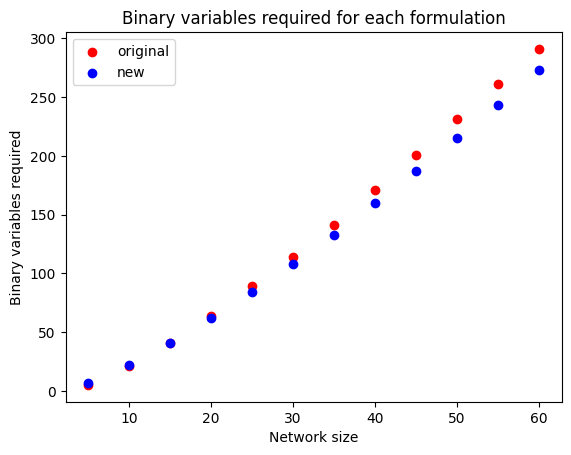

In [7]:
plt.title('Binary variables required for each formulation')
plt.xlabel('Network size')
plt.ylabel('Binary variables required')

plt.scatter(locations_array[:,0], locations_array[:,1], color='red', label='original')
plt.scatter(locations_array[:,0], locations_array[:,2], color='blue', label='new')

plt.legend()
plt.savefig(filename)
plt.show()

In [ ]:
df = pd.DataFrame(
    locations_array, 
    columns=['locations', 'non-factorial', 'factorial', 'combinations'
             ]
    )

df['locations'] = df['locations'].astype(int)
df['non-factorial'] = df['non-factorial'].astype(int)
df['factorial'] = df['factorial'].astype(int)
df['combinations'] = df['combinations'].round(2)

pd.set_option('display.float_format', '{:.2e}'.format)

print(df.to_string(index=False))

 locations  non-factorial  factorial  combinations
         5              5          7      1.20e+01
        10             21         22      1.81e+05
        15             41         41      4.36e+10
        20             64         62      6.08e+16
        25             89         84      3.10e+23
        30            114        108      4.42e+30
        35            141        133      1.48e+38
        40            171        160      1.02e+46
        45            201        187      1.33e+54
        50            231        215      3.04e+62
        55            261        243      1.15e+71
        60            291        273      6.93e+79


## Hot start

In [ ]:
loc_list = [5, 8, 12, 15, 26, 42, 48]

for locs in loc_list:
    print(f'For {locs} locations')
    distance_array, best_dist = find_distances_array(locs, print_comments=True)
    hot_start_list = hot_start(distance_array, locs)

    bin_hot_start_list =  hot_start_list_to_string(hot_start_list, 
                                                   locs, 
                                                   GRAY,
                                                   DECODING_FORMULATION
                                                   )
    
    cost_fn = cost_fn_fact(locs,distance_array, GRAY, DECODING_FORMULATION)
    hot_start_distance = cost_fn(bin_hot_start_list)
    quality = best_dist / hot_start_distance
    print(f'The hot start distance is {hot_start_distance}, compared to a best distance of {best_dist}.')
    print(f'The hot start quality is {quality:.1%}')


For 5 locations
Reading distance data
Data will be read from filename networks\five_d.txt.
It is known that the shortest distance is 19
The hot start distance is 21.0, compared to a best distance of 19.
The hot start quality is 90.5%
For 8 locations
Reading distance data
Data will be read from filename networks\sim_dist_8_locs.txt.
It is known that the shortest distance is 277.2
The hot start distance is 315.8, compared to a best distance of 277.2.
The hot start quality is 87.8%
For 12 locations
Reading distance data
Data will be read from filename networks\sim_dist_12_locs.txt.
It is known that the shortest distance is 297.2
The hot start distance is 385.5, compared to a best distance of 297.2.
The hot start quality is 77.1%
For 15 locations
Reading distance data
Data will be read from filename networks\p01_d.txt.
It is known that the shortest distance is 291
The hot start distance is 291.0, compared to a best distance of 291.
The hot start quality is 100.0%
For 26 locations
Reading d